<a href="https://colab.research.google.com/github/PROACT-team/PROACT/blob/main/%EC%98%88%EB%B9%84%EC%8B%A4%ED%97%985/regression%26evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 데이터 전처리

In [2]:
mean_ver_filtered = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/예비실험 5/mean_ver_filtered.csv')
min_ver_filtered = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/예비실험 5/min_ver_filtered.csv')
slope_alsfrs_scores = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/예비실험 5/slope_alsfrs_scores_filtered.csv')

In [3]:
slope_alsfrs_scores.drop(columns='Unnamed: 0', inplace=True)
slope_alsfrs_scores = slope_alsfrs_scores.iloc[1:, 1:]

In [4]:
slope_alsfrs_scores.isnull().sum().sum()

0

In [5]:
slope_alsfrs_scores = slope_alsfrs_scores.reset_index()

In [6]:
mean_ver_filtered.drop(columns='Unnamed: 0', inplace=True)
min_ver_filtered.drop(columns='Unnamed: 0', inplace=True)


In [7]:
X_mean = mean_ver_filtered.drop(columns=['SubjectID', 'ALSFRS_slope'])
y = mean_ver_filtered[['ALSFRS_slope']]
X_1 = pd.concat([X_mean, slope_alsfrs_scores], axis=1)
X = X_1.drop(columns='index')

In [8]:
X = X.astype('float64')

In [9]:
X.isnull().sum().sum()

0

### Train/Test set 분리

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=11)

### 모델 생성 및 학습

### (1) Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
fitted_model_lr = model_lr.fit(X_train, y_train)

In [13]:
import statsmodels.api as sm
x_train1 = sm.add_constant(X_train,has_constant="add")

model = sm.OLS(y_train,X_train)
fitted_model_lr2 = model.fit()

fitted_model_lr2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           ALSFRS_slope   R-squared (uncentered):                   0.658
Model:                            OLS   Adj. R-squared (uncentered):              0.651
Method:                 Least Squares   F-statistic:                              88.94
Date:                Thu, 08 Apr 2021   Prob (F-statistic):                   1.24e-277
Time:                        11:51:27   Log-Likelihood:                         -1145.0
No. Observations:                1320   AIC:                                      2346.
Df Residuals:                    1292   BIC:                                      2491.
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Age                              -0.0094      0.001     -7.265      0.000      -0.012      -0.007
Gender                           -0.0259      0.035     -0.735      0.462      -0.095       0.043
onset_delta                      -0.0003    3.5e-05     -8.486      0.000      -0.000      -0.000
diag_delta                       -0.0002   5.14e-05     -3.171      0.002      -0.000   -6.21e-05
diag_minus_onset                  0.0001   4.94e-05      2.714      0.007    3.72e-05       0.000
mean_alsfrs_total                -0.0411      0.007     -5.876      0.000      -0.055      -0.027
alsfrs_total_slope                0.6623      3.047      0.217      0.828      -5.316       6.640
fvc_slope                         0.0794      0.052      1.523      0.128      -0.023       0.182
fvc_mean                          0.0009      0.001      0.827      0.409      -0.001       0.003
mean_Q1_Speech                    0.1332      0.028      4.771      0.000       0.078       0.188
mean_Q2_Salivation               -0.0274      0.029     -0.939      0.348      -0.085       0.030
mean_Q3_Swallowing               -0.0845      0.032     -2.680      0.007      -0.146      -0.023
mean_Q4_Handwriting              -0.0704      0.027     -2.654      0.008      -0.123      -0.018
mean_Q5_Cutting                   0.0951      0.028      3.346      0.001       0.039       0.151
mean_Q6_Dressing_and_Hygiene     -0.0680      0.037     -1.833      0.067      -0.141       0.005
mean_Q7_Turning_in_Bed            0.0994      0.036      2.762      0.006       0.029       0.170
mean_Q8_Walking                  -0.0143      0.033     -0.432      0.665      -0.079       0.051
mean_Q9_Climbing_Stairs          -0.0069      0.024     -0.284      0.776      -0.054       0.041
mean_Q10_Respiratory             -0.0972      0.026     -3.776      0.000      -0.148      -0.047
mean_Bulbar                       0.0487      0.015      3.243      0.001       0.019       0.078
mean_motor                        0.0348      0.007      4.645      0.000       0.020       0.049
slope_Q1_Speech                  -2.2281      1.260     -1.769      0.077      -4.699       0.243
slope_Q2_Salivation              -1.4288      3.258     -0.439      0.661      -7.820       4.962
slope_Q3_Swallowing               2.1148      1.331      1.589      0.112      -0.496       4.725
slope_Q4_Handwriting              0.3092      1.769      0.175      0.861      -3.162       3.780
slope_Q5_Cutting                  1.2902      1.455      0.887      0.375      -1.564       4.144
slope_Q6_Dressing_and_Hygiene     2.7466      1.820      1.510      0.131      -0.823       6.316
slope_Q7_Turning_in_Bed          -1.6945    

In [14]:
fitted_model_lr2.params

Age                             -0.009436
Gender                          -0.025934
onset_delta                     -0.000297
diag_delta                      -0.000163
diag_minus_onset                 0.000134
mean_alsfrs_total               -0.041118
alsfrs_total_slope               0.662316
fvc_slope                        0.079396
fvc_mean                         0.000934
mean_Q1_Speech                   0.133194
mean_Q2_Salivation              -0.027419
mean_Q3_Swallowing              -0.084461
mean_Q4_Handwriting             -0.070438
mean_Q5_Cutting                  0.095054
mean_Q6_Dressing_and_Hygiene    -0.068027
mean_Q7_Turning_in_Bed           0.099354
mean_Q8_Walking                 -0.014297
mean_Q9_Climbing_Stairs         -0.006858
mean_Q10_Respiratory            -0.097218
mean_Bulbar                      0.048732
mean_motor                       0.034788
slope_Q1_Speech                 -2.228065
slope_Q2_Salivation             -1.428815
slope_Q3_Swallowing              2

### (2) XGBoost

In [15]:
from xgboost import XGBRegressor

In [16]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[11:51:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### (3) Random Forests

In [17]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### 모델 평가하기

### (1) MAE, RMSE, R2

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [19]:
# Predict를 수행하고 mean_absolute_error, rmse, r-squared 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)
pred_rf = model_rf.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test, pred_xgb)))
print('XGB R2:',  r2_score(y_test, pred_xgb))

print('LR MAE:', mean_absolute_error(y_test, pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test, pred_lr)))
print('LR R2:',  r2_score(y_test, pred_lr))

print('RF MAE:', mean_absolute_error(y_test, pred_rf))
print('RF RMSE:', sqrt(mean_squared_error(y_test, pred_rf)))
print('RF R2:',  r2_score(y_test, pred_rf))

XGB MAE: 0.43132728354590383
XGB RMSE: 0.5413124593328296
XGB R2: 0.20328252312145656
LR MAE: 0.4638225811694992
LR RMSE: 0.5666949579426502
LR R2: 0.12681353628501302
RF MAE: 0.43437753770164034
RF RMSE: 0.544346631892575
RF R2: 0.194325946465441


### (2) Pearson Correlation score

In [39]:
from scipy import stats
print("XGB PC:", stats.pearsonr(pred_xgb, y_test))
print("LR PC:", stats.pearsonr(pred_lr, y_test))
print("RF PC:", stats.pearsonr(pred_rf, y_test))

TypeError: ignored

### (3) 실제 값과 추측 값 시각화

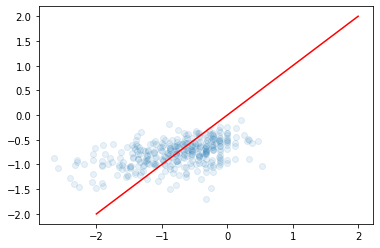

In [43]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter( y_test,pred_xgb, alpha=0.1)
plt.plot([-2, 2], [-2,2], 'r-')

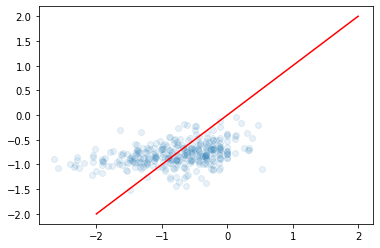

In [44]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(  y_test,pred_lr,alpha=0.1)
plt.plot([-2, 2], [-2, 2], 'r-')

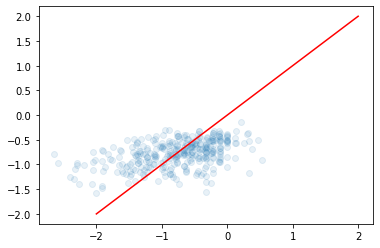

In [45]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(  y_test,pred_rf,alpha=0.1)
plt.plot([-2, 2], [-2, 2], 'r-')

### (4) XGBoost와 Random forest 모델의 feature importance 시각화

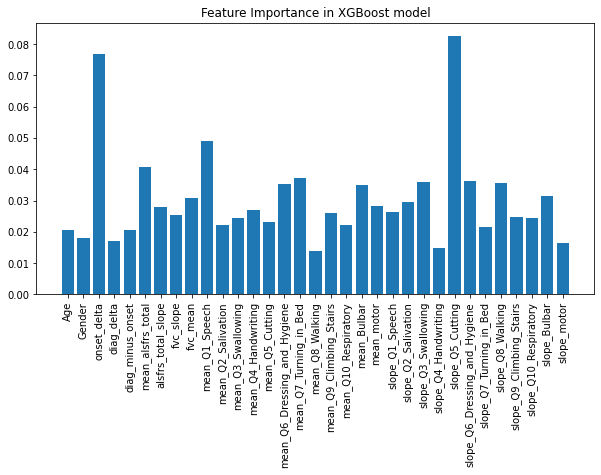

In [24]:
fig = plt.figure(figsize=(10,5))
plt.bar(X_train.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance in XGBoost model')
plt.show()

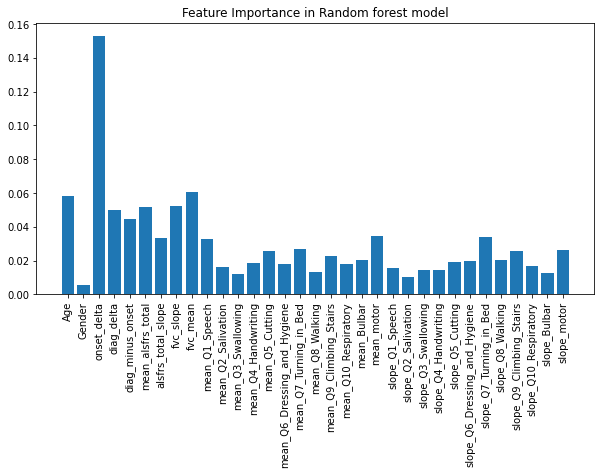

In [25]:
fig2 = plt.figure(figsize=(10,5))
plt.bar(X_train.columns, model_rf.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance in Random forest model')
plt.show()

### 5-fold cross validation

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [28]:
scores_lr_r2 = cross_val_score(model_lr, X_train, y_train, scoring='r2', cv=folds)
scores_lr_rmse = cross_val_score(model_lr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores_lr_mae = cross_val_score(model_lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

In [29]:
scores_xgb_r2 = cross_val_score(model_xgb, X_train, y_train, scoring='r2', cv=folds)
scores_xgb_rmse = cross_val_score(model_xgb, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores_xgb_mae = cross_val_score(model_xgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

[11:51:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:51:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:51:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:51:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:51:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:51:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:51:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:51:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [30]:
scores_rf_r2 = cross_val_score(model_rf, X_train, y_train, scoring='r2', cv=folds)
scores_rf_rmse = cross_val_score(model_rf, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores_rf_mae = cross_val_score(model_rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [31]:
## Summary of LR model
print("MAE of LR model in 5 fold cv:", scores_lr_mae*(-1))
print("with its mean value:", scores_lr_mae.mean()*(-1))

print("R2 of LR model in 5 fold cv:", scores_lr_r2)
print("with its mean value:", scores_lr_r2.mean())

print("RMSE of LR model in 5 fold cv:", scores_lr_rmse*(-1))
print("with its mean value:", scores_lr_rmse.mean()*(-1))

MAE of LR model in 5 fold cv: [0.44996729 0.44614609 0.38876303 0.45633517 0.52277857]
with its mean value: 0.4527980298106103
R2 of LR model in 5 fold cv: [0.07281413 0.1082313  0.16626283 0.0671735  0.03402998]
with its mean value: 0.08970234710161651
RMSE of LR model in 5 fold cv: [0.57148479 0.56524365 0.48966839 0.59098546 0.67336525]
with its mean value: 0.5781495064513299


In [32]:
## Summary of XGB model
print("MAE of XGB model in 5 fold cv:", scores_xgb_mae*(-1))
print("with its mean value:", scores_xgb_mae.mean()*(-1))

print("R2 of XGB model in 5 fold cv:", scores_xgb_r2)
print("with its mean value:", scores_xgb_r2.mean())

print("RMSE of XGB model in 5 fold cv:", scores_xgb_rmse*(-1))
print("with its mean value:", scores_xgb_rmse.mean()*(-1))

MAE of XGB model in 5 fold cv: [0.44216338 0.44155398 0.40607284 0.47101064 0.49235937]
with its mean value: 0.450632040638857
R2 of XGB model in 5 fold cv: [0.09694522 0.11722177 0.03731646 0.01773788 0.10648927]
with its mean value: 0.07514212087653023
RMSE of XGB model in 5 fold cv: [0.56399898 0.56238715 0.52617385 0.60644309 0.64761778]
with its mean value: 0.5813241691937008


In [33]:
## Summary of RF model
print("MAE of RF model in 5 fold cv:", scores_rf_mae*(-1))
print("with its mean value:", scores_rf_mae.mean()*(-1))

print("R2 of RF model in 5 fold cv:", scores_rf_r2)
print("with its mean value:", scores_rf_r2.mean())

print("RMSE of RF model in 5 fold cv:", scores_rf_rmse*(-1))
print("with its mean value:", scores_rf_rmse.mean()*(-1))

MAE of RF model in 5 fold cv: [0.4492715  0.42393961 0.40347101 0.47358084 0.49030125]
with its mean value: 0.4481128411691354
R2 of RF model in 5 fold cv: [0.08359364 0.15350865 0.08361499 0.0207818  0.08581607]
with its mean value: 0.08546303017069926
RMSE of RF model in 5 fold cv: [0.56862988 0.55172172 0.50885697 0.603139   0.65474025]
with its mean value: 0.5774175619517395


In [34]:
data = [[scores_lr_mae.mean()*(-1), scores_lr_r2.mean(),scores_lr_rmse.mean()*(-1)], 
     [scores_xgb_mae.mean()*(-1), scores_xgb_r2.mean(), scores_xgb_rmse.mean()*(-1)], 
     [scores_rf_mae.mean()*(-1), scores_rf_r2.mean(), scores_rf_rmse.mean()*(-1)]]

E = pd.DataFrame(data, columns=['MAE', 'R squared', 'RMSE'], index=['Linear Regression', 'XGBoost', 'Random Forest'])
print(E)

                        MAE  R squared      RMSE
Linear Regression  0.452798   0.089702  0.578150
XGBoost            0.450632   0.075142  0.581324
Random Forest      0.448113   0.085463  0.577418


### Repeated 5-fold cv: with visualization

In [34]:
from sklearn.model_selection import RepeatedKFold

In [50]:
lr_R2 = np.array([])
lr_MAE = np.array([])
lr_RMSE = np.array([])

random_num_list = [10,20,30,40,50,60,70,80,90,100]
for i in random_num_list:
    arr = cross_val_score(model_lr, X_train, y_train, scoring='r2', cv=KFold(n_splits = 5, shuffle = True, random_state = i))
    lr_R2 = np.concatenate((lr_R2, arr))

for i in random_num_list:
    arr_2 = cross_val_score(model_lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=KFold(n_splits = 5, shuffle = True, random_state = i))    
    lr_MAE = np.concatenate((lr_MAE, arr_2))

for i in random_num_list:
    arr_3 = cross_val_score(model_lr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=KFold(n_splits = 5, shuffle = True, random_state = i))    
    lr_RMSE = np.concatenate((lr_RMSE, arr_3))

In [51]:
xgb_R2 = np.array([])
xgb_MAE = np.array([])
xgb_RMSE = np.array([])

for i in random_num_list:
    arr_4 = cross_val_score(model_xgb, X_train, y_train, scoring='r2', cv=KFold(n_splits = 5, shuffle = True, random_state = i))
    xgb_R2 = np.concatenate((xgb_R2, arr_4))

for i in random_num_list:
    arr_5 = cross_val_score(model_xgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=KFold(n_splits = 5, shuffle = True, random_state = i))    
    xgb_MAE = np.concatenate((xgb_MAE, arr_5))

for i in random_num_list:
    arr_6 = cross_val_score(model_xgb, X_train, y_train, scoring='neg_root_mean_squared_error', cv=KFold(n_splits = 5, shuffle = True, random_state = i))    
    xgb_RMSE = np.concatenate((xgb_RMSE, arr_6))

[12:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [52]:
rf_R2 = np.array([])
rf_MAE = np.array([])
rf_RMSE = np.array([])

for i in random_num_list:
    arr_4 = cross_val_score(model_rf, X_train, y_train, scoring='r2', cv=KFold(n_splits = 5, shuffle = True, random_state = i))
    rf_R2 = np.concatenate((rf_R2, arr_4))

for i in random_num_list:
    arr_5 = cross_val_score(model_rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=KFold(n_splits = 5, shuffle = True, random_state = i))    
    rf_MAE = np.concatenate((rf_MAE, arr_5))

for i in random_num_list:
    arr_6 = cross_val_score(model_rf, X_train, y_train, scoring='neg_root_mean_squared_error', cv=KFold(n_splits = 5, shuffle = True, random_state = i))    
    rf_RMSE = np.concatenate((rf_RMSE, arr_6))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

visualization through boxplot

In [64]:
r2_to_plot = [lr_R2, xgb_R2, rf_R2]
mae_to_plot = [lr_MAE*(-1), xgb_MAE*(-1), rf_MAE*(-1)]
rmse_to_plot = [lr_RMSE*(-1), xgb_RMSE*(-1), rf_RMSE*(-1)]

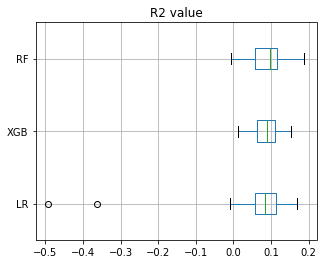

In [70]:
df = pd.DataFrame(r2_to_plot, index=['LR', 'XGB', 'RF'])

df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.title('R2 value')

plt.show()

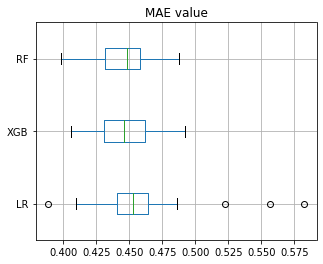

In [69]:
df2 = pd.DataFrame(mae_to_plot, index=['LR', 'XGB', 'RF'])

df2.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.title('MAE value')

plt.show()

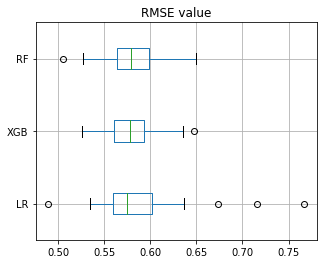

In [68]:
df3 = pd.DataFrame(rmse_to_plot, index=['LR', 'XGB', 'RF'])

df3.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.title('RMSE value')

plt.show()

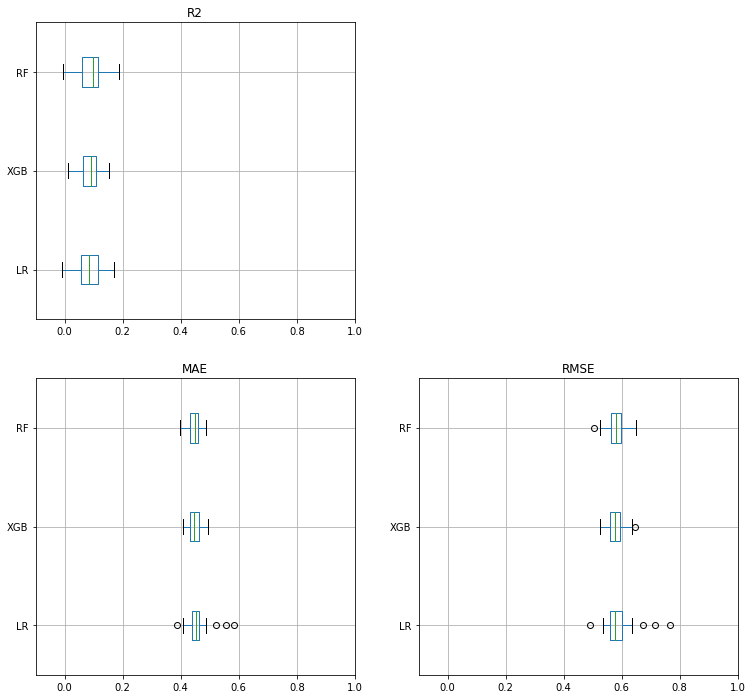

In [85]:
# Compare in the same frame
plt.figure(figsize=(15, 12))

plt.subplot(221)
df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.xlim(-0.1, 1)
plt.title('R2')

plt.subplot(223)
df2.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.xlim(-0.1, 1)
plt.title('MAE')

plt.subplot(224)
df3.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.xlim(-0.1, 1)
plt.title('RMSE')

plt.show()